# Telco Customer Churn Challenge

Useful resources:
  - `Theory.pdf`;
  - Central Limit Theorem Visualization: http://mfviz.com/central-limit/;
  - Standard Deviation: https://en.wikipedia.org/wiki/Standard_deviation.

---

The [Bias-Variance Tradeoff](https://en.wikipedia.org/wiki/Bias%E2%80%93variance_tradeoff)

We can reason about them as follows:

- bias: how "dumb" the model is;
- variance: how uncertain the model is.

<img src='https://raw.githubusercontent.com/SimeonHristov99/ML_23-24/main/assets/BiasVarianceTradeoff.png'>

Bias and variance as function of model complexity:

<img src='https://upload.wikimedia.org/wikipedia/commons/9/9f/Bias_and_variance_contributing_to_total_error.svg'>

---

- Type of problem trees and forests can solve: Classification and Regression
- Do trees require scaling of the data? No.
- Goal: Predict whether a customer will churn.

## Imports and Constants

# Task 1

> Note: Most likely you don't have the package `xgboost` installed. You can install it with Python's package manager - `pip`:

```console
pip install xgboost
```

In [1]:
# Add magic command to delete all saved variables
%reset -f

In [28]:
# Imports and constant values here
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

## Get the data

In [3]:
# Load and display the `Telco-Customer-Churn.csv` file from the GitHub repo and save it in a dataframe `df_churn`.
df_churn = pd.read_csv('https://raw.githubusercontent.com/SimeonHristov99/ML_23-24/main/DATA/Telco-Customer-Churn.csv')
df_churn

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7027,6840-RESVB,Male,0,Yes,Yes,24,Yes,Yes,DSL,Yes,...,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.50,No
7028,2234-XADUH,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,No,...,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.90,No
7029,4801-JZAZL,Female,0,Yes,Yes,11,No,No phone service,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,No
7030,8361-LTMKD,Male,1,Yes,No,4,Yes,Yes,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Mailed check,74.40,306.60,Yes


## Exploratory Data Analysis

In [5]:
# Display a summary of the features.
df_churn.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7032 entries, 0 to 7031
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7032 non-null   object 
 1   gender            7032 non-null   object 
 2   SeniorCitizen     7032 non-null   int64  
 3   Partner           7032 non-null   object 
 4   Dependents        7032 non-null   object 
 5   tenure            7032 non-null   int64  
 6   PhoneService      7032 non-null   object 
 7   MultipleLines     7032 non-null   object 
 8   InternetService   7032 non-null   object 
 9   OnlineSecurity    7032 non-null   object 
 10  OnlineBackup      7032 non-null   object 
 11  DeviceProtection  7032 non-null   object 
 12  TechSupport       7032 non-null   object 
 13  StreamingTV       7032 non-null   object 
 14  StreamingMovies   7032 non-null   object 
 15  Contract          7032 non-null   object 
 16  PaperlessBilling  7032 non-null   object 


In [7]:
# Display summary statistics. What do you see?
df_churn.describe().T

,count,mean,std,min,25%,50%,75%,max
SeniorCitizen,7032.0,0.162400,0.368844,0.00,0.0000,0.000,0.0000,1.00
tenure,7032.0,32.421786,24.545260,1.00,9.0000,29.000,55.0000,72.00
MonthlyCharges,7032.0,64.798208,30.085974,18.25,35.5875,70.350,89.8625,118.75
TotalCharges,7032.0,2283.300441,2266.771362,18.80,401.4500,1397.475,3794.7375,8684.80


In [11]:
# Show the statistics for the non-numeric features. What do you see?
df_churn.select_dtypes(['object']).describe().T

,count,unique,top,freq
customerID,7032,7032,7590-VHVEG,1
gender,7032,2,Male,3549
Partner,7032,2,No,3639
Dependents,7032,2,No,4933
PhoneService,7032,2,Yes,6352
MultipleLines,7032,3,No,3385
InternetService,7032,3,Fiber optic,3096
OnlineSecurity,7032,3,No,3497
OnlineBackup,7032,3,No,3087
DeviceProtection,7032,3,No,3094


I am not sure what I am supposed to see, but I can tell that most of the non-numeric features are actually boolean features that hide behind a yes/no string.

In [13]:
# Are there any missing values?
df_churn.isnull().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

In [15]:
# Check the distribution of the target variable. What are the conclusions?
df_churn['Churn'].value_counts()

Churn
No     5163
Yes    1869
Name: count, dtype: int64

The conclusion is that the target variable isn't balanced and we need to account for that.

In [24]:
# Output the unique values. If they are less than 12, print them.
# Your output needn't match exactly.
# What do you see?
for col in df_churn:
  unq_vals = df_churn[col].unique()
  num_unq_vals = len(unq_vals)
  
  if num_unq_vals < 12:
    print(f'Unique {col:17} | {df_churn[col].dtype} | {num_unq_vals:5} | {unq_vals}')
  else:
    print(f'Unique {col:17} | {df_churn[col].dtype} | {num_unq_vals:5} |')

Unique customerID        | object |  7032 |
Unique gender            | object |     2 | ['Female' 'Male']
Unique SeniorCitizen     | int64 |     2 | [0 1]
Unique Partner           | object |     2 | ['Yes' 'No']
Unique Dependents        | object |     2 | ['No' 'Yes']
Unique tenure            | int64 |    72 |
Unique PhoneService      | object |     2 | ['No' 'Yes']
Unique MultipleLines     | object |     3 | ['No phone service' 'No' 'Yes']
Unique InternetService   | object |     3 | ['DSL' 'Fiber optic' 'No']
Unique OnlineSecurity    | object |     3 | ['No' 'Yes' 'No internet service']
Unique OnlineBackup      | object |     3 | ['Yes' 'No' 'No internet service']
Unique DeviceProtection  | object |     3 | ['No' 'Yes' 'No internet service']
Unique TechSupport       | object |     3 | ['No' 'Yes' 'No internet service']
Unique StreamingTV       | object |     3 | ['No' 'Yes' 'No internet service']
Unique StreamingMovies   | object |     3 | ['No' 'Yes' 'No internet service']
Unique Con

We can see that there are problematic values, such as 'No' and 'No phone service' which mean the same thing.

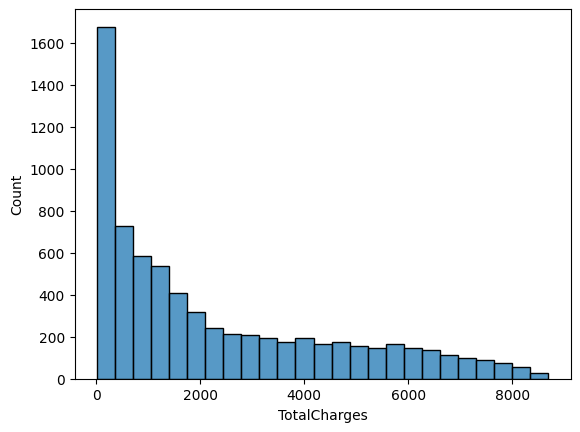

In [31]:
# Plot the distribution of the `TotalCharges` column.
sns.histplot(df_churn['TotalCharges']);

In [39]:
# Show relationships between numeric features and the target column.
# Create a table of the proper numeric features.
numeric_features = df_churn[['tenure', 'MonthlyCharges', 'TotalCharges', 'Churn']]
numeric_features

,tenure,MonthlyCharges,TotalCharges,Churn
0,1,29.85,29.85,No
1,34,56.95,1889.50,No
2,2,53.85,108.15,Yes
3,45,42.30,1840.75,No
4,2,70.70,151.65,Yes
...,...,...,...,...
7027,24,84.80,1990.50,No
7028,72,103.20,7362.90,No
7029,11,29.60,346.45,No
7030,4,74.40,306.60,Yes


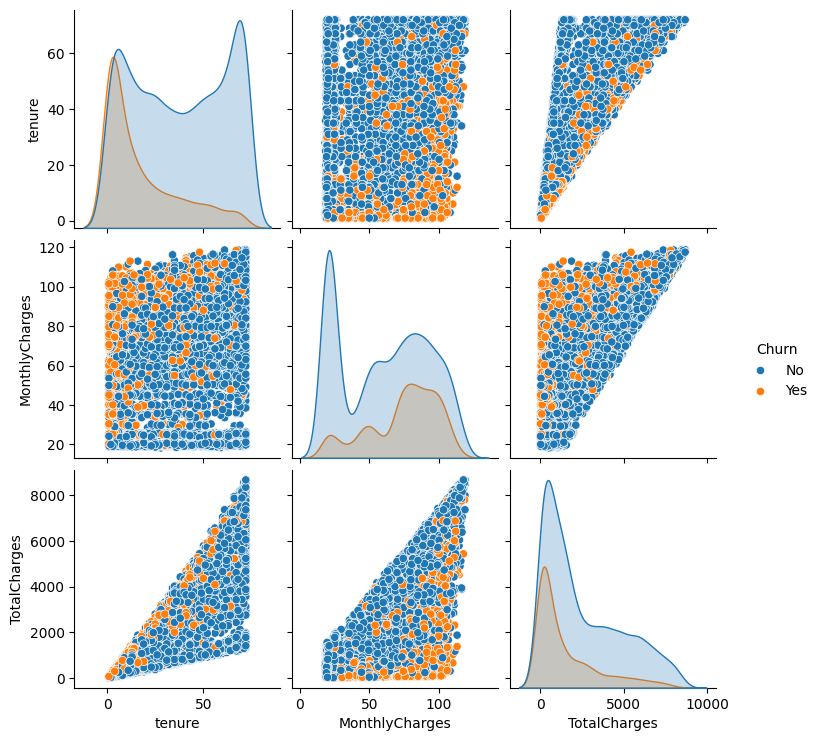

In [44]:
# and then use `sns.pairplot` to visualize the relationships.
# What do you see?
sns.pairplot(numeric_features, hue='Churn')

In [46]:
# Show relationships between categorical features and the target column.
# Get a list of them first.
cat_features = df_churn.select_dtypes('object').columns.drop(['customerID', 'Churn'])
cat_features

Index(['gender', 'Partner', 'Dependents', 'PhoneService', 'MultipleLines',
       'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection',
       'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract',
       'PaperlessBilling', 'PaymentMethod'],
      dtype='object')

/tmp/ipykernel_23634/1860085437.py:8: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  fig.show()
/tmp/ipykernel_23634/1860085437.py:8: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  fig.show()
/tmp/ipykernel_23634/1860085437.py:8: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  fig.show()
/tmp/ipykernel_23634/1860085437.py:8: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  fig.show()
/tmp/ipykernel_23634/1860085437.py:8: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  fig.show()
/tmp/ipykernel_23634/1860085437.py:8: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  fig.show()
/tmp/ipykernel_23634/1860085437.py:8: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  fig.show()
/tmp/ipykernel_23634/1860085437.py:8: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  fig.show()


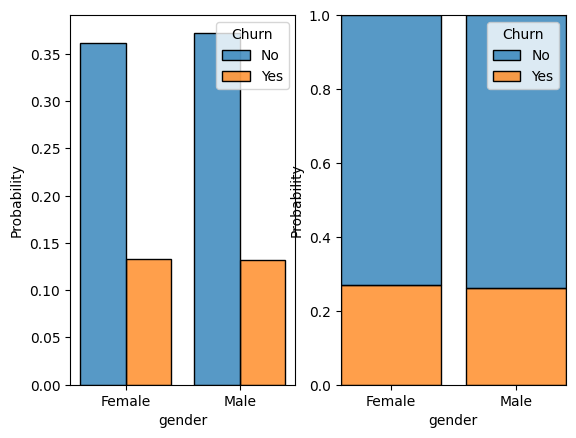

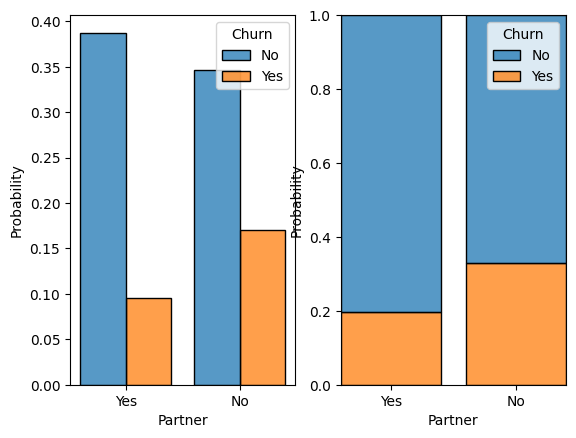

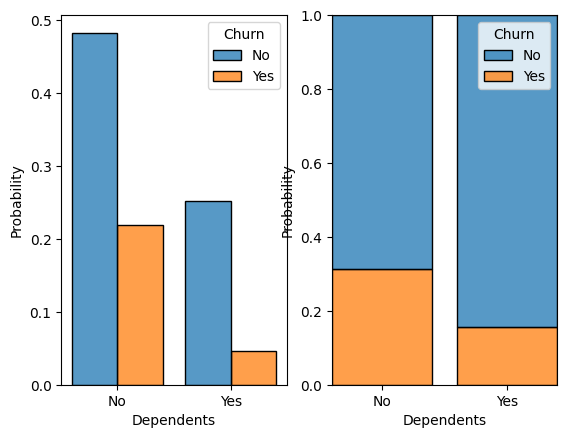

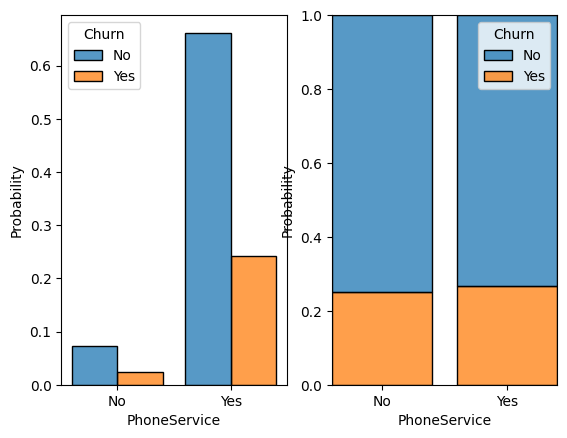

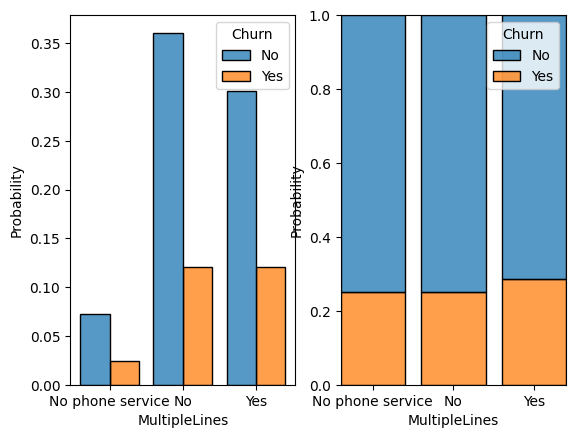

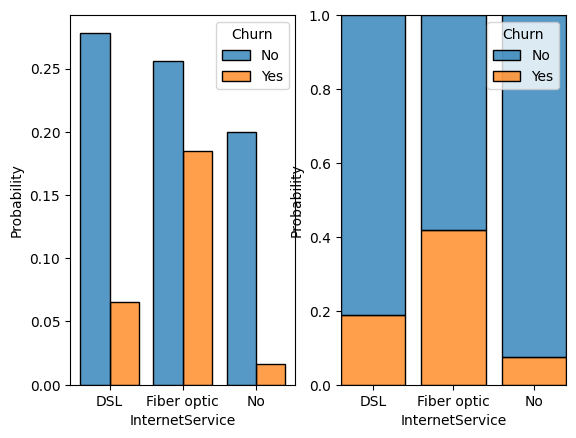

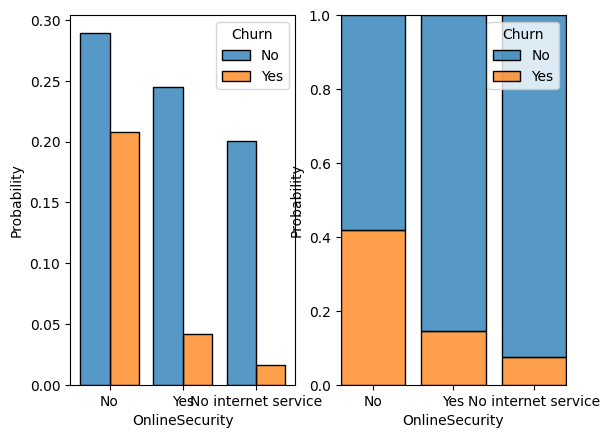

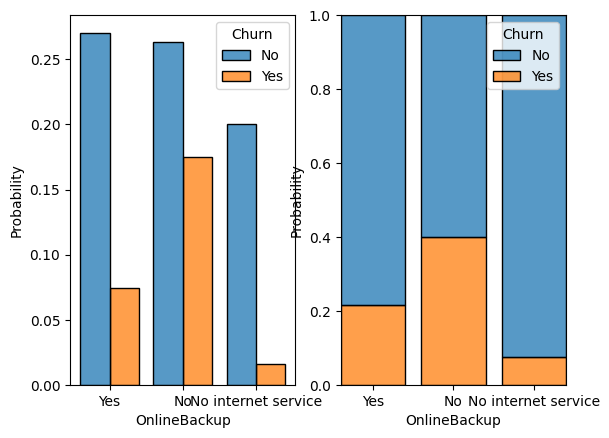

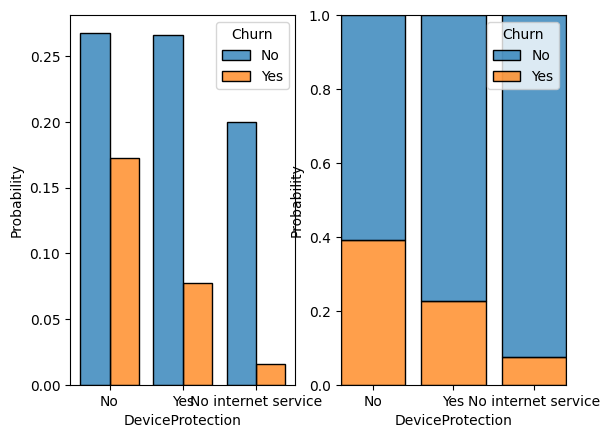

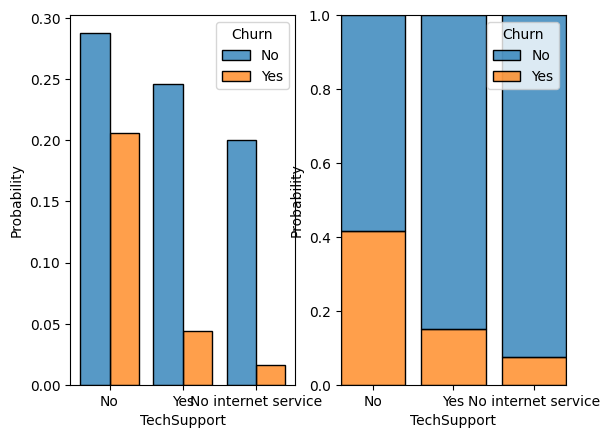

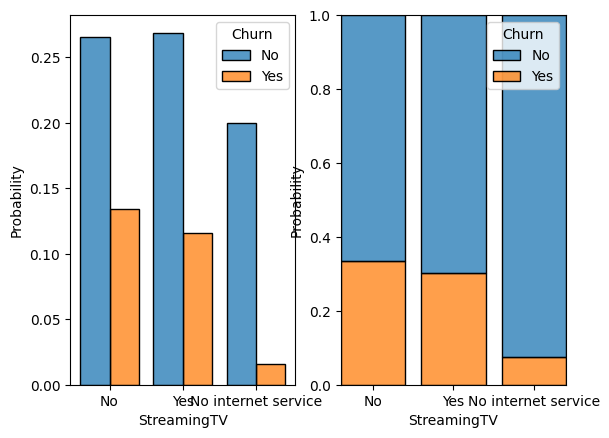

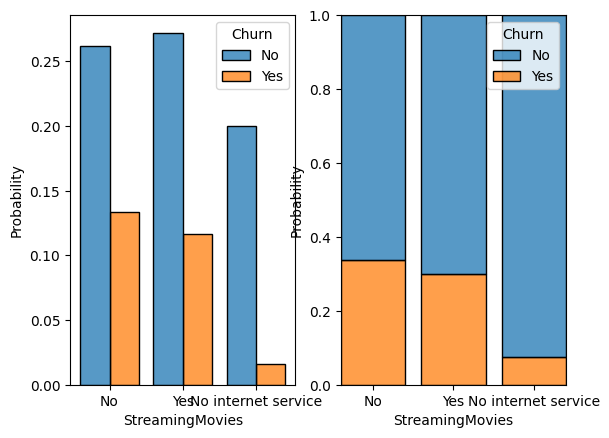

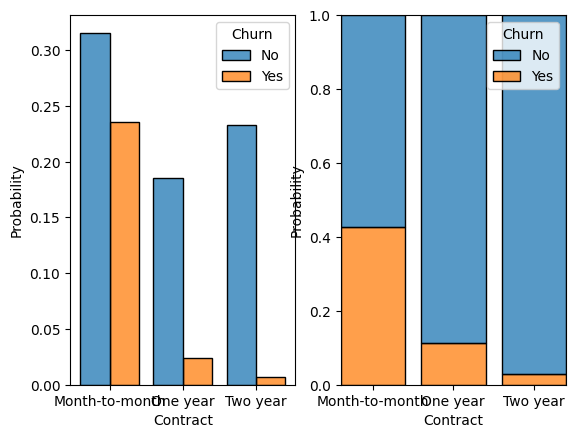

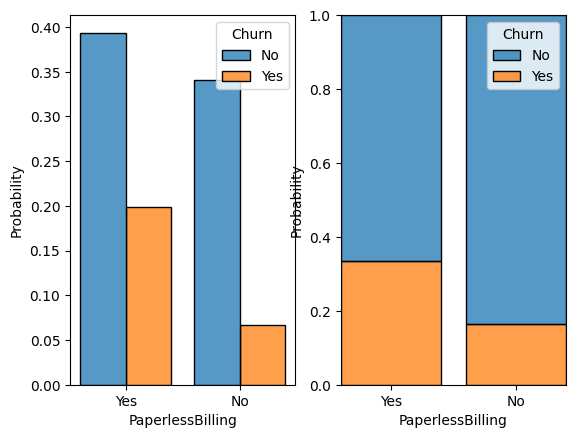

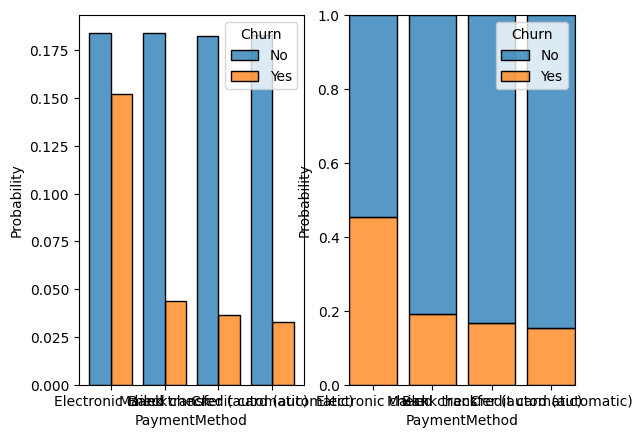

In [48]:
# Then use the below code to visualize the relationship.
# What do you see?

for col in cat_features:
  fig, ax = plt.subplots(1,2)
  ax1 = sns.histplot(data=df_churn, x=col, hue="Churn", stat="probability", multiple="dodge", shrink=.8, ax=ax[0])
  ax2 = sns.histplot(data=df_churn, x=col, hue="Churn", stat="probability", multiple="fill", shrink=.8, ax=ax[1])
  fig.show()

# Task 2

## Preprocessing

Create a `preprocess_inputs` function that takes a dataframe and performs the following operations on it:
- drops the `customerID` column. Can you answer why?
- one-hot encodes categorical features. *Hint: see `pd.get_dummies`.*
- splits the data into `X` and `y`;
- Label-encodes the target column for easier interpretation (1 meaning 'Yes' and 0 meaning 'No');
- performs a train-test split, keeping 30% of the data for testing.

In [61]:
def preprocess_inputs(df : pd.DataFrame) -> pd.DataFrame:
    df = df.drop(columns=['customerID'])
    
    return df
    
preprocess_inputs(df_churn)

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No
2,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7027,Male,0,Yes,Yes,24,Yes,Yes,DSL,Yes,No,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.50,No
7028,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,No,Yes,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.90,No
7029,Female,0,Yes,Yes,11,No,No phone service,DSL,Yes,No,No,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,No
7030,Male,1,Yes,No,4,Yes,Yes,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Mailed check,74.40,306.60,Yes


<img src='https://raw.githubusercontent.com/SimeonHristov99/ML_23-24/main/assets/ohe.png'>

In [139]:
# Display X_train

,tenure,MonthlyCharges,TotalCharges,gender_Female,SeniorCitizen_0,Partner_No,Dependents_No,PhoneService_No,PaperlessBilling_No,MultipleLines_No,...,StreamingMovies_No,StreamingMovies_No internet service,StreamingMovies_Yes,Contract_Month-to-month,Contract_One year,Contract_Two year,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
2351,46,45.20,2065.15,False,True,True,True,False,False,True,...,True,False,False,True,False,False,False,True,False,False
4025,68,84.65,5683.60,False,False,False,False,False,False,False,...,True,False,False,True,False,False,False,False,True,False
4354,29,58.75,1696.20,False,True,True,True,False,False,True,...,True,False,False,False,True,False,False,False,True,False
5240,72,67.20,4671.70,False,True,True,False,True,True,False,...,False,False,True,False,False,True,False,True,False,False
4019,72,114.30,8058.55,False,True,False,False,False,False,False,...,False,False,True,False,False,True,False,True,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
175,34,24.70,780.20,True,True,False,True,False,True,False,...,False,True,False,True,False,False,False,False,True,False
123,7,50.70,350.35,True,True,False,False,False,True,True,...,True,False,False,True,False,False,False,False,False,True
1321,1,69.25,69.25,True,False,True,True,False,False,True,...,True,False,False,True,False,False,False,False,True,False
2538,13,98.15,1230.25,False,True,True,True,False,True,False,...,False,False,True,True,False,False,False,False,False,True


In [140]:
# Display y_train

2351    0
4025    0
4354    0
5240    0
4019    0
       ..
175     0
123     0
1321    1
2538    1
3465    0
Name: Churn, Length: 4922, dtype: int64

# Task 3

## Model building

In [141]:
# Create the `results` table - "df_results".

,experiment,accuracy,precision,recall,f1-score


### Decision Tree

In [142]:
# Train a DecisionTreeClassifier() with default parameters and evaluate it.
# Show "df_results" (output may vary because of randomness).

C:\Users\c86608b\AppData\Local\Temp\1\ipykernel_3984\146028450.py:4: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  df_results = pd.concat([df_results, pd.DataFrame({


,experiment,accuracy,precision,recall,f1-score,log_loss
0,decision_tree_default_args,0.700948,0.456559,0.462069,0.459297,10.778931


In [143]:
# Train a DecisionTreeClassifier() with a maximum depth of 3 and evaluate it.
# Show "df_results" (output may vary because of randomness).

,experiment,accuracy,precision,recall,f1-score,log_loss
0,decision_tree_default_args,0.700948,0.456559,0.462069,0.459297,10.778931
1,decision_tree_max_depth_3,0.786730,0.718121,0.368966,0.487472,7.687035


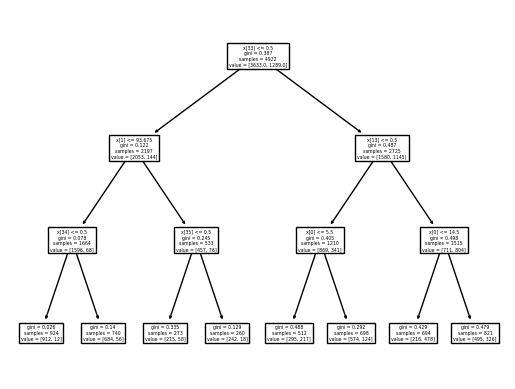

In [144]:
# Use the sklearn.tree.plot_tree function to display the tree.

In [145]:
# Train a DecisionTreeClassifier() with a maximum depth of 3 and entropy as the criterion for splitting the nodes and evaluate it.
# Show "df_results" (output may vary because of randomness).

,experiment,accuracy,precision,recall,f1-score,log_loss
0,decision_tree_default_args,0.700948,0.456559,0.462069,0.459297,10.778931
1,decision_tree_max_depth_3,0.786730,0.718121,0.368966,0.487472,7.687035
2,decision_tree_max_depth_3_entropy,0.786730,0.718121,0.368966,0.487472,7.687035


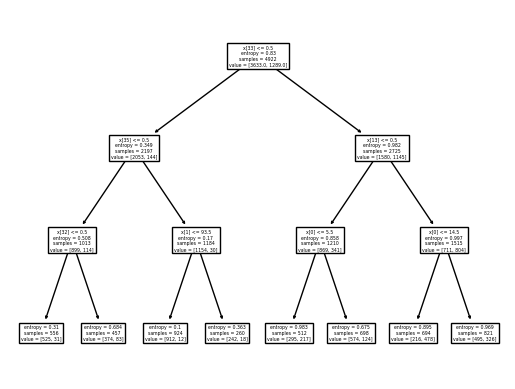

In [146]:
# Use the sklearn.tree.plot_tree function to display the tree.

In [147]:
# Train a DecisionTreeClassifier() with a maximum depth of 4 and minimum samples per leaf equal to 1 and evaluate it.
# Show "df_results" (output may vary because of randomness).

,experiment,accuracy,precision,recall,f1-score,log_loss
0,decision_tree_default_args,0.700948,0.456559,0.462069,0.459297,10.778931
1,decision_tree_max_depth_3,0.786730,0.718121,0.368966,0.487472,7.687035
2,decision_tree_max_depth_3_entropy,0.786730,0.718121,0.368966,0.487472,7.687035
3,decision_tree_max_depth_4_min_samples_leaft_1,0.777725,0.624719,0.479310,0.542439,8.011599


In [148]:
# Use the ".feature_importances_" property of the model and the columns in the training data to create a table of the feature importances.
# Sort it in a descending order and display it.

,column,importance
33,Contract_Month-to-month,0.541050
0,tenure,0.176474
13,InternetService_Fiber optic,0.147367
14,InternetService_No,0.037694
1,MonthlyCharges,0.022270
38,PaymentMethod_Electronic check,0.021505
2,TotalCharges,0.021113
7,PhoneService_No,0.013917
34,Contract_One year,0.009662
35,Contract_Two year,0.005711


<Axes: title={'center': 'Ten most important features'}, xlabel='importance', ylabel='column'>

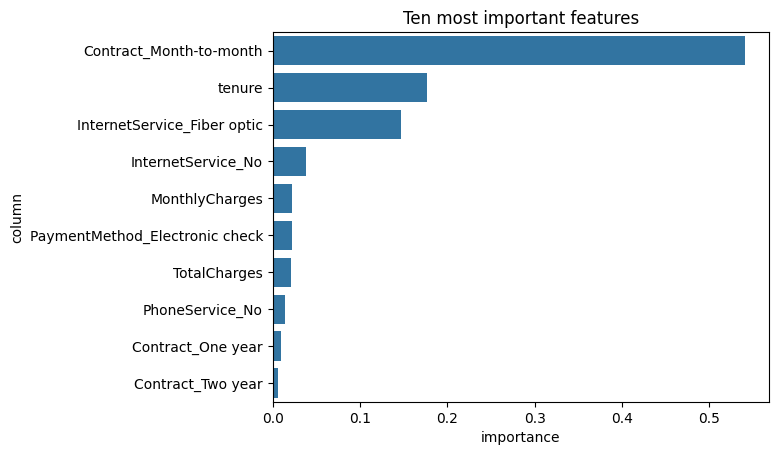

In [149]:
# Visualize the top 10 most important features.

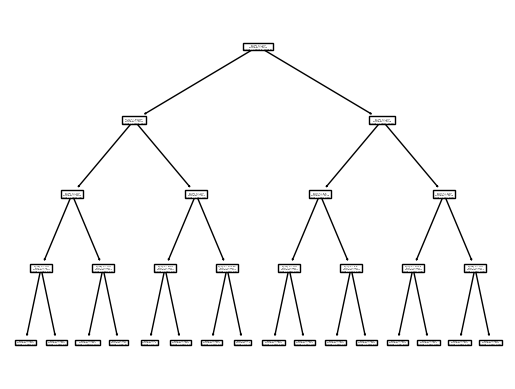

In [150]:
# Display the tree.

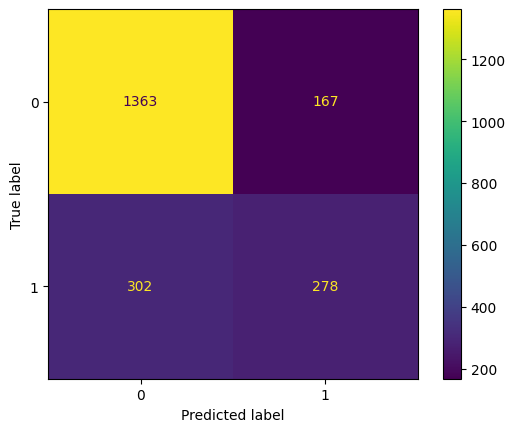

In [151]:
# Display the confusion matrix. What you do see?

In [152]:
# Train a DecisionTreeClassifier() with a maximum depth of 7 and minimum samples per leaf equal to 3 and evaluate it.
# Show "df_results" (output may vary because of randomness).

,experiment,accuracy,precision,recall,f1-score,log_loss
0,decision_tree_default_args,0.700948,0.456559,0.462069,0.459297,10.778931
1,decision_tree_max_depth_3,0.786730,0.718121,0.368966,0.487472,7.687035
2,decision_tree_max_depth_3_entropy,0.786730,0.718121,0.368966,0.487472,7.687035
3,decision_tree_max_depth_4_min_samples_leaft_1,0.777725,0.624719,0.479310,0.542439,8.011599
4,decision_tree_max_depth_7_min_samples_leaft_3,0.783886,0.628099,0.524138,0.571429,7.789529


# Task 4

## Model building. Random forest

In [153]:
# Train a RandomForestClassifier() with 100 trees and evaluate it.
# Show "df_results" (output may vary because of randomness).

,experiment,accuracy,precision,recall,f1-score,log_loss
0,decision_tree_default_args,0.700948,0.456559,0.462069,0.459297,10.778931
1,decision_tree_max_depth_3,0.786730,0.718121,0.368966,0.487472,7.687035
2,decision_tree_max_depth_3_entropy,0.786730,0.718121,0.368966,0.487472,7.687035
3,decision_tree_max_depth_4_min_samples_leaft_1,0.777725,0.624719,0.479310,0.542439,8.011599
4,decision_tree_max_depth_7_min_samples_leaft_3,0.783886,0.628099,0.524138,0.571429,7.789529
5,random_forest_n_estimators_100,0.783886,0.628099,0.524138,0.571429,7.789529


In [154]:
# Train a RandomForestClassifier() with 50 trees and evaluate it.
# Show "df_results" (output may vary because of randomness).

,experiment,accuracy,precision,recall,f1-score,log_loss
0,decision_tree_default_args,0.700948,0.456559,0.462069,0.459297,10.778931
1,decision_tree_max_depth_3,0.786730,0.718121,0.368966,0.487472,7.687035
2,decision_tree_max_depth_3_entropy,0.786730,0.718121,0.368966,0.487472,7.687035
3,decision_tree_max_depth_4_min_samples_leaft_1,0.777725,0.624719,0.479310,0.542439,8.011599
4,decision_tree_max_depth_7_min_samples_leaft_3,0.783886,0.628099,0.524138,0.571429,7.789529
5,random_forest_n_estimators_100,0.783886,0.628099,0.524138,0.571429,7.789529
6,random_forest_n_estimators_50,0.783886,0.649758,0.463793,0.541247,7.789529


In [155]:
# Train a RandomForestClassifier() with 150 trees and evaluate it.
# Show "df_results" (output may vary because of randomness).

,experiment,accuracy,precision,recall,f1-score,log_loss
0,decision_tree_default_args,0.700948,0.456559,0.462069,0.459297,10.778931
1,decision_tree_max_depth_3,0.786730,0.718121,0.368966,0.487472,7.687035
2,decision_tree_max_depth_3_entropy,0.786730,0.718121,0.368966,0.487472,7.687035
3,decision_tree_max_depth_4_min_samples_leaft_1,0.777725,0.624719,0.479310,0.542439,8.011599
4,decision_tree_max_depth_7_min_samples_leaft_3,0.783886,0.628099,0.524138,0.571429,7.789529
5,random_forest_n_estimators_100,0.783886,0.628099,0.524138,0.571429,7.789529
6,random_forest_n_estimators_50,0.783886,0.649758,0.463793,0.541247,7.789529
7,random_forest_n_estimators_150,0.782464,0.647202,0.458621,0.536831,7.840776


### Hyperparameter tuning via Grid Search

In [162]:
# Doing this by hand it not efficient and is time consuming.
# Do a grid search for the RandomForestClassifier() on the following values:

# - criterions goes through 'gini', 'entropy'
# - n_estimators goes through 10, 50, 100, 150, 200
# - max_features goes through 1, 'sqrt', 'log2'
# - max_depths goes through None, 2, 3, 4, 5, 10, 20

# Display the best scores.

f1 for (10, 1, None, 'gini'): 0.48
f1 for (10, 1, None, 'entropy'): 0.50
f1 for (10, 1, 2, 'gini'): 0.00
f1 for (10, 1, 2, 'entropy'): 0.00
f1 for (10, 1, 3, 'gini'): 0.05
f1 for (10, 1, 3, 'entropy'): 0.00
f1 for (10, 1, 4, 'gini'): 0.15
f1 for (10, 1, 4, 'entropy'): 0.00
f1 for (10, 1, 5, 'gini'): 0.26
f1 for (10, 1, 5, 'entropy'): 0.30
f1 for (10, 1, 10, 'gini'): 0.55
f1 for (10, 1, 10, 'entropy'): 0.57
f1 for (10, 1, 20, 'gini'): 0.50
f1 for (10, 1, 20, 'entropy'): 0.49
f1 for (10, 'sqrt', None, 'gini'): 0.50
f1 for (10, 'sqrt', None, 'entropy'): 0.51
f1 for (10, 'sqrt', 2, 'gini'): 0.06
f1 for (10, 'sqrt', 2, 'entropy'): 0.32
f1 for (10, 'sqrt', 3, 'gini'): 0.43
f1 for (10, 'sqrt', 3, 'entropy'): 0.52
f1 for (10, 'sqrt', 4, 'gini'): 0.51
f1 for (10, 'sqrt', 4, 'entropy'): 0.55
f1 for (10, 'sqrt', 5, 'gini'): 0.54
f1 for (10, 'sqrt', 5, 'entropy'): 0.50
f1 for (10, 'sqrt', 10, 'gini'): 0.56
f1 for (10, 'sqrt', 10, 'entropy'): 0.58
f1 for (10, 'sqrt', 20, 'gini'): 0.53
f1 for (10, '

[((200, 'log2', 10, 'gini'), 0.5780933062880325),
 ((100, 'sqrt', 10, 'entropy'), 0.5771543086172345),
 ((50, 'sqrt', 10, 'gini'), 0.5763052208835341),
 ((100, 'log2', 10, 'entropy'), 0.5763052208835341),
 ((200, 'sqrt', 10, 'gini'), 0.576),
 ((100, 'sqrt', 10, 'gini'), 0.5757575757575758),
 ((10, 'sqrt', 10, 'entropy'), 0.575098814229249),
 ((150, 'sqrt', 10, 'entropy'), 0.5711382113821138),
 ((50, 'log2', 10, 'entropy'), 0.570281124497992),
 ((100, 'log2', 10, 'gini'), 0.5688259109311741),
 ((150, 'sqrt', 10, 'gini'), 0.5685279187817259),
 ((10, 1, 10, 'entropy'), 0.5658835546475995),
 ((150, 'log2', 10, 'entropy'), 0.5650406504065041),
 ((10, 'log2', 10, 'entropy'), 0.5647058823529412),
 ((10, 'log2', 10, 'gini'), 0.5636363636363636),
 ((150, 'log2', 10, 'gini'), 0.5636363636363636),
 ((200, 'log2', 10, 'entropy'), 0.5621840242669363),
 ((10, 'sqrt', 10, 'gini'), 0.5621301775147929),
 ((50, 'log2', 10, 'gini'), 0.5607287449392713),
 ((200, 'sqrt', 10, 'entropy'), 0.560081466395112),

In [163]:
# Print the best scores.
# What are the best parameters?

[((200, 'log2', 10, 'gini'), 0.5780933062880325),
 ((100, 'sqrt', 10, 'entropy'), 0.5771543086172345),
 ((50, 'sqrt', 10, 'gini'), 0.5763052208835341),
 ((100, 'log2', 10, 'entropy'), 0.5763052208835341),
 ((200, 'sqrt', 10, 'gini'), 0.576),
 ((100, 'sqrt', 10, 'gini'), 0.5757575757575758),
 ((10, 'sqrt', 10, 'entropy'), 0.575098814229249),
 ((150, 'sqrt', 10, 'entropy'), 0.5711382113821138),
 ((50, 'log2', 10, 'entropy'), 0.570281124497992),
 ((100, 'log2', 10, 'gini'), 0.5688259109311741),
 ((150, 'sqrt', 10, 'gini'), 0.5685279187817259),
 ((10, 1, 10, 'entropy'), 0.5658835546475995),
 ((150, 'log2', 10, 'entropy'), 0.5650406504065041),
 ((10, 'log2', 10, 'entropy'), 0.5647058823529412),
 ((10, 'log2', 10, 'gini'), 0.5636363636363636),
 ((150, 'log2', 10, 'gini'), 0.5636363636363636),
 ((200, 'log2', 10, 'entropy'), 0.5621840242669363),
 ((10, 'sqrt', 10, 'gini'), 0.5621301775147929),
 ((50, 'log2', 10, 'gini'), 0.5607287449392713),
 ((200, 'sqrt', 10, 'entropy'), 0.560081466395112),

What is the conclusion - did random forest perform better than a single decision tree?